In [2]:
import random

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
random.seed()

In [4]:
df=pd.read_csv("project_final_num.csv")

In [1]:
pwd

'C:\\Users\\lenovo\\Downloads'

In [5]:
independent_variables = df.drop('genre', axis=1)

In [6]:
x = independent_variables.values
y = df['genre'].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25, random_state = random.randrange(99999), shuffle = True)

In [14]:
lr = LogisticRegression(C=1e5, solver='newton-cg', multi_class='multinomial')

In [15]:
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

print(lr)
print('Coefficients = ', lr.coef_)
print('Intercept = ', lr.intercept_)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)
Coefficients =  [[ 7.12067632e-01 -8.26888936e+00  5.38048650e+00  3.48478217e+00
   2.84026065e+00 -1.33882619e-01 -1.70888163e+00 -5.83665663e+00
  -2.58466122e+00  1.92060178e+00  1.78916384e-01  1.50070232e+00
   1.33198967e+00 -8.97575268e-01 -2.81618636e+00]
 [-4.17946303e+00  2.06972185e+01 -6.97251209e+00  6.61302259e+00
  -4.28286322e+00 -8.36394359e+00 -1.24038833e+01  3.75300188e+00
   1.42234794e+00 -4.51976975e+00 -6.54053041e+00 -1.78545333e+00
  -8.62312101e+00 -5.70170167e+00 -2.08494816e-01]
 [ 5.25827684e-01 -1.55701841e+01  7.14490521e+00 -9.31256192e+00
   5.44607943e+00  4.85585153e+00  6.38763602e+00 -5.50158495e+00
  -6.30087904e+00 -1.02160252e+00  3.72527514e+00 -9.93296724e-01


In [16]:
print('Training Accuracy {}'.format(lr.score(x_train, y_train)))
print('Training Confusion = {}'.format(metrics.confusion_matrix(y_pred_train, y_train, [0,1,2,3,4,5])))
print(classification_report(y_train, y_pred_train))
print('========================================================')
print('Test Accuracy {}'.format(lr.score(x_test, y_test)))
print('Test Confusion = {}'.format(metrics.confusion_matrix(y_pred_test, y_test, [0,1,2,3,4,5])))
print(classification_report(y_test, y_pred_test))

Training Accuracy 0.8533333333333334
Training Confusion = [[56  0  2  4  0  7]
 [ 1 73  0  0  0  1]
 [ 2  0 58  4  6  4]
 [ 5  0  2 73  0  0]
 [ 0  0  5  0 72  7]
 [ 4  1  8  0  3 52]]
             precision    recall  f1-score   support

          0       0.81      0.82      0.82        68
          1       0.97      0.99      0.98        74
          2       0.78      0.77      0.78        75
          3       0.91      0.90      0.91        81
          4       0.86      0.89      0.87        81
          5       0.76      0.73      0.75        71

avg / total       0.85      0.85      0.85       450

Test Accuracy 0.7866666666666666
Test Confusion = [[24  1  0  2  0  2]
 [ 2 25  0  0  0  0]
 [ 0  0 22  1  2  5]
 [ 6  0  1 16  0  0]
 [ 0  0  1  0 16  7]
 [ 0  0  1  0  1 15]]
             precision    recall  f1-score   support

          0       0.83      0.75      0.79        32
          1       0.93      0.96      0.94        26
          2       0.73      0.88      0.80        2


		  Training Data


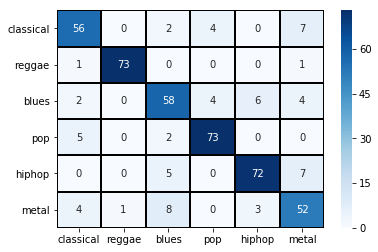

In [19]:
import matplotlib.pyplot as plt
cmap=plt.cm.Blues
import seaborn as sn
df_cm_test=metrics.confusion_matrix(y_pred_train, y_train, [0,1,2,3,4,5])
plot_labels=['classical','reggae','blues','pop','hiphop','metal']
print('\033[1m'+"\n\t\t  Training Data")
gra=sn.heatmap(df_cm_test,cmap=cmap,linecolor="#000000",linewidth=1,annot=True,xticklabels=plot_labels,yticklabels=plot_labels)



		  Testing Data


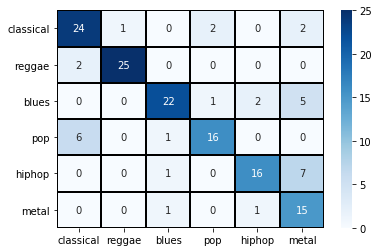

In [18]:
df_cm_test=metrics.confusion_matrix(y_pred_test, y_test, [0,1,2,3,4,5])
plot_labels=['classical','reggae','blues','pop','hiphop','metal']
print('\033[1m'+"\n\t\t  Testing Data")
gra=sn.heatmap(df_cm_test,cmap=cmap,linecolor="#000000",linewidth=1,annot=True,xticklabels=plot_labels,yticklabels=plot_labels)